In [238]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns
import pandas as pd

In [239]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]

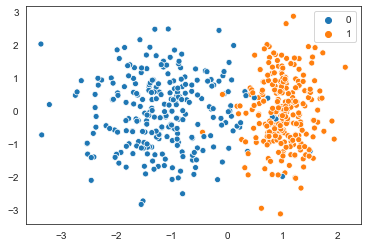

In [240]:
sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

In [241]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [242]:
def dcost_dtheta(x,y):
    delta = x.T @ (y - sigmoid(x))
    return delta

In [243]:
def find_cost(x,y,theta):
    m = len(x)
    true = (y).reshape(m) * (np.log(sigmoid(x@theta))).reshape(m)
    false = (1-y).reshape(m) * (np.log(1 - sigmoid(x@theta))).reshape(m)
    output = true  + false
    return -1*sum(output)/m

In [244]:
X = np.hstack((np.ones((len(X),1)),X))

In [245]:
theta = np.zeros((3,1))
theta

array([[0.],
       [0.],
       [0.]])

In [246]:
learning_rate = 0.06

In [247]:
theta.shape

(3, 1)

In [248]:
iterations = 1000
for i in range(iterations):
    cost = find_cost(X,y,theta)
    delta = -1 *(X.T @ (y - sigmoid(X@theta)))
    theta = theta - learning_rate*delta
    

In [249]:
def predict(X, theta):
    return np.round(sigmoid(X @ theta))

In [250]:
y_pred = predict(X,theta)

In [251]:
from sklearn.metrics import classification_report

In [252]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       254
           1       0.96      0.98      0.97       246

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [253]:
score = float(sum(y_pred == y))/ float(len(y))
print(score)

0.966


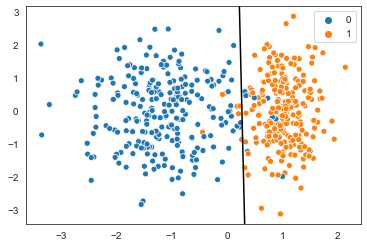

In [254]:
slope = -(theta[1] / theta[2])
intercept = -(theta[0] / theta[2])

sns.set_style('white')
sns.scatterplot(X[:,1],X[:,2],hue=y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");